In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
data.set_index('Date', inplace= True)

In [4]:
data.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Date,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [5]:
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

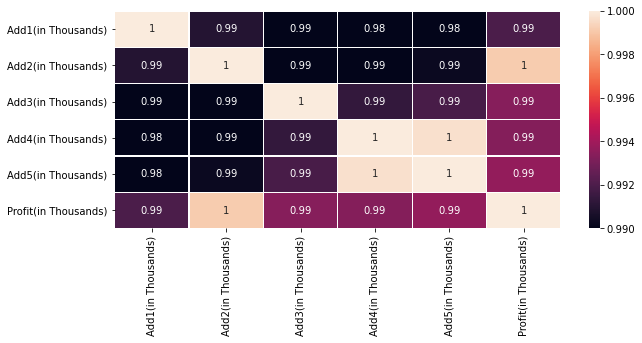

In [7]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=.99,vmax=1,annot=True,linewidths=0.2)

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [10]:
y= data['Profit(in Thousands)']
X= data.drop(['Add1(in Thousands)'],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [12]:
from sklearn import linear_model

In [13]:
lr = linear_model.LinearRegression()

In [14]:
model = lr.fit(X_train,y_train)

In [15]:
predictions = model.predict(X_test)

In [16]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 32